### Netflix EDA
- 아래의 서비스에서 데이터를 수집하여 EDA를 수행하세요.


- flixpatrol 사이트에서 데이터 수집
    - `https://flixpatrol.com/top10/netflix/world/2021/full/#netflix-1`


- kaggle에서 netflix 컨텐츠 데이터 수집
    - `https://www.kaggle.com/shivamb/netflix-shows`


- 컨텐츠의 등급데이터는 아래의 코드 사용
```
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                  'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                  'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                  'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
```

### flixpatrol 사이트에서 제목 데이터 수집

In [110]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

In [144]:
country, year = "world", 2021
url = f"https://flixpatrol.com/top10/netflix/{country}/{year}/full"
url

'https://flixpatrol.com/top10/netflix/world/2021/full'

In [145]:
response = requests.get(url)
response

<Response [200]>

In [146]:
netflix = BeautifulSoup(response.text, "html.parser")
type(netflix)

bs4.BeautifulSoup

#### 영화 제목 수집

In [149]:
elements = netflix.select("#netflix-1 > div.-mx-content > div > div > table > tbody > tr")

movie_titles = []
for element in elements:
    movie_titles.append({
        "title": element.select("td")[2].text.strip(),
        "points": element.select("td")[3].text,
        "countries": element.select("td")[5].text,
        "days": element.select("td")[7].text,
    })
    
flix_movies = pd.DataFrame(movie_titles)
flix_movies.head()

,title,points,countries,days
0,Red Notice,"25,918",90,48
1,We Can Be Heroes,"25,311",82,214
2,Army of the Dead,"18,888",89,92
3,Wish Dragon,"16,953",82,88
4,Army of Thieves,"15,081",90,52


#### 드라마 제목 수집

In [150]:
elements = netflix.select("#netflix-2 > div.-mx-content > div > div > table > tbody > tr")

tv_titles = []
for element in elements:
    tv_titles.append({
        "title": element.select("td")[2].text.strip(),
        "points": element.select("td")[3].text,
        "countries": element.select("td")[5].text,
        "days": element.select("td")[7].text,
    })
    
flix_tvs = pd.DataFrame(tv_titles)
flix_tvs.head()

,title,points,countries,days
0,Squid Game,"57,980",90,104
1,Money Heist,"44,382",91,364
2,Lupin,"42,690",83,256
3,Sex/Life,"34,609",82,141
4,Bridgerton,"33,973",82,146


### kaggle에서 컨텐츠 데이터 수집

#### csv 파일 열기

In [77]:
flix_data = pd.read_csv("netflix_titles.csv")
flix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [78]:
flix_data.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


#### 데이터 shape 및 columns 확인

In [80]:
flix_data.shape

(8807, 12)

In [81]:
flix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### columns 이름 수정(listed_in -> genres)

In [82]:
flix_data.rename(columns = {"listed_in": "genres"}, inplace=True)
flix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

#### 결측치 현황
- date_added, rating, duration의 경우 비중이 적어 dropna로 제거 후 사용해도 될 것으로 보임

In [101]:
null_data = flix_data.isnull().sum().sort_values(ascending = False)
null_df = pd.concat([null_data],axis=1,keys=['lost data'])
null_df.head(10)

,lost data
director,2634
country,831
cast,825
date_added,10
rating,4
duration,3
show_id,0
type,0
title,0
release_year,0


#### rating 일부 결측치 수정

In [103]:
flix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [121]:
flix_data.index[flix_data['rating'] == '74 min'].tolist()

[5541]

In [114]:
flix_data.loc[5541]

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                     74 min
duration                                                      NaN
genres                                                     Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object

In [122]:
flix_data.loc[5541,'duration'] = '74 min'

In [123]:
flix_data.index[flix_data['rating'] == '84 min'].tolist()

[5794]

In [124]:
flix_data.loc[5794]

show_id                                                     s5795
type                                                        Movie
title                                       Louis C.K.: Hilarious
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                     September 16, 2016
release_year                                                 2010
rating                                                     84 min
duration                                                      NaN
genres                                                     Movies
description     Emmy-winning comedy writer Louis C.K. brings h...
Name: 5794, dtype: object

In [125]:
flix_data.loc[5794,'duration'] = '84 min'

In [126]:
flix_data.index[flix_data['rating'] == '66 min'].tolist()

[5813]

In [128]:
flix_data.loc[5813]

show_id                                                     s5814
type                                                        Movie
title                        Louis C.K.: Live at the Comedy Store
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                        August 15, 2016
release_year                                                 2015
rating                                                     66 min
duration                                                      NaN
genres                                                     Movies
description     The comic puts his trademark hilarious/thought...
Name: 5813, dtype: object

In [129]:
flix_data.loc[5813,'duration'] = '66 min'

In [134]:
flix_data['rating'].replace({'74 min':'NR'},inplace=True)
flix_data['rating'].replace({'84 min':'NR'},inplace=True)
flix_data['rating'].replace({'66 min':'NR'},inplace=True)

#### ratings 등급별 카테고리 재설정

In [136]:
flix_data[(flix_data['rating'] == 'TV-Y')] = 'Kids'
flix_data[(flix_data['rating'] == 'TV-G')] = 'Kids'
flix_data[(flix_data['rating'] == 'G')] = 'Kids'

flix_data[(flix_data['rating'] == 'TV-PG')] = 'Older Kids'
flix_data[(flix_data['rating'] == 'TV-Y7-FV')] = 'Older Kids'
flix_data[(flix_data['rating'] == 'TV-Y7')] = 'Older Kids'
flix_data[(flix_data['rating'] == 'PG')] = 'Older Kids'

flix_data[(flix_data['rating'] == 'TV-14')] = 'Teens'
flix_data[(flix_data['rating'] == 'PG-13')] = 'Teens'

flix_data[(flix_data['rating'] == 'TV-MA')] = 'Adults'
flix_data[(flix_data['rating'] == 'R')] = 'Adults'
flix_data[(flix_data['rating'] == 'NR')] = 'Adults'
flix_data[(flix_data['rating'] == 'UR')] = 'Adults'
flix_data[(flix_data['rating'] == 'NC-17')] = 'Adults'

flix_data['rating'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', nan], dtype=object)

In [139]:
flix_data.isnull().sum()

show_id         0
type            0
title           0
director        3
cast            0
country         1
date_added      0
release_year    0
rating          4
duration        0
genres          0
description     0
dtype: int64

#### EDA의 수행 절차
- 데이터 수집
- 결측 데이터의 처리
- 데이터 탐색
    - 수집한 데이터에서 자유롭게 주제를 선정하여 데이터 분석을 통한 인사이트 도출
    - 예시 : 인도영화는 다른 국가보다 러닝타임이 길것이다. 컨텐츠의 퀄리티가 가장 좋은 국가는?

#### 컨텐츠 타입과 컨텐츠 등급별 컨텐츠의 비율

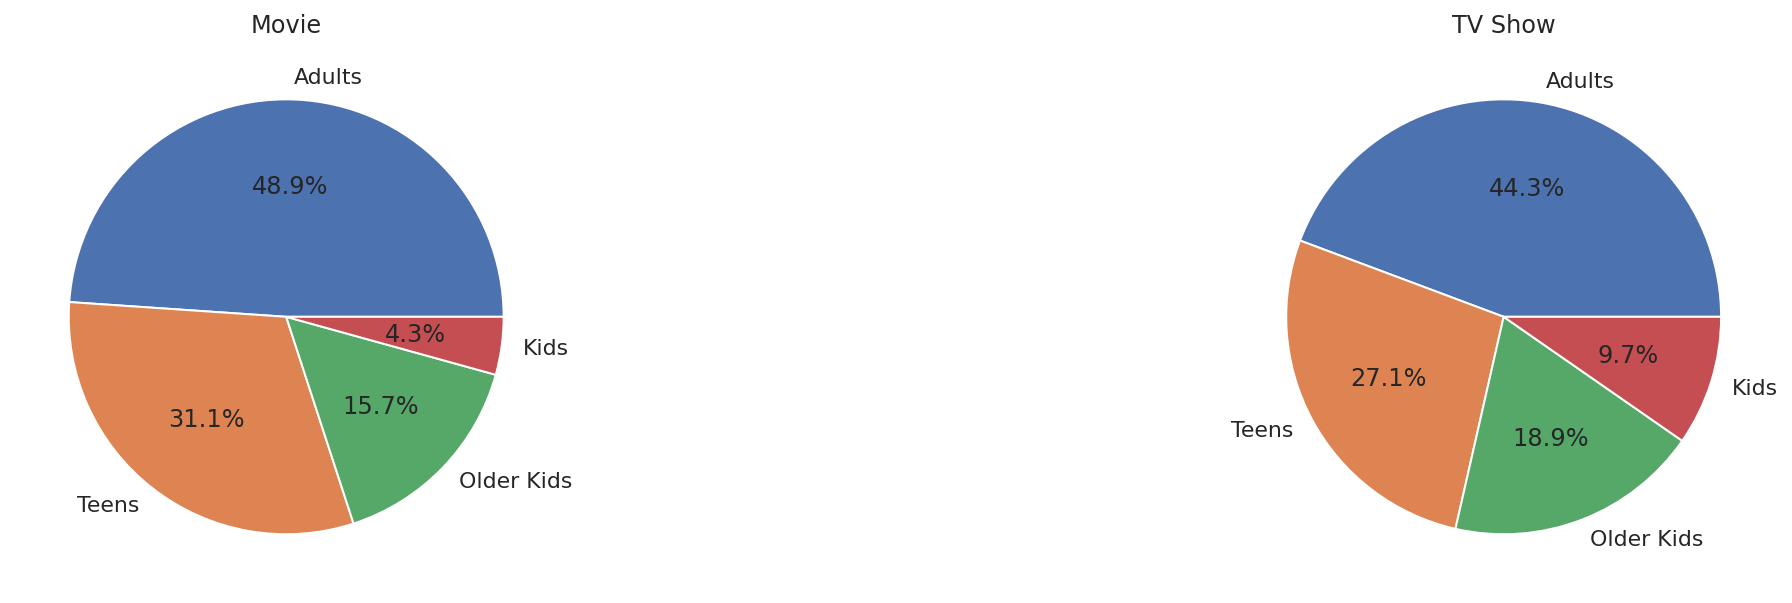

In [21]:
# 아래의 코드는 EDA의 예시를 보여주는 것으로 실제 코드가 동작되지 않습니다.

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Movie")
plt.pie(movie_count.values, labels=movie_count.index, autopct="%1.1f%%")

plt.subplot(122)
plt.title("TV Show")
plt.pie(tv_count.values, labels=tv_count.index, autopct="%1.1f%%")

plt.show()

결론 : 영화가 TV쇼 보다 청소년 관람불가 등급의 비율이 더 높고 TV가 영화보다 청소년관람등급의 컨텐츠의 비율이 더 높습니다.